# Notes of the course Hypothesis Testing in Python - Datacamp
By César Muro.

In [1]:
# Import pandas
import pandas as pd
import numpy as np

# Import the course datasets 
republican_votes = pd.read_feather('datasets/repub_votes_potus_08_12.feather')
democrat_votes = pd.read_feather('datasets/dem_votes_potus_12_16.feather')
late_shipments = pd.read_feather('datasets/late_shipments.feather')
stackoverflow = pd.read_feather("datasets/stack_overflow.feather")

## Hyphotesis testing use case:  
Determine whether sample statistics are close o far away from expected (or "hypothesized values").  

Recall that the standard deviation of the sample statistics in the bootstrap distribution estimates the standard error of the statistic.  
Since variables have arbitrary units and ranges, before we test our hypothesis, we need to standardize the values. A common way of standardizing values is to subtract the mean, and divide by the standard deviation.  
$$ standardized value=\frac{value-mean}{standard. deviation} $$  

 For hypothesis testing, we use a variation where we take the sample statistic, subtract the hypothesized parameter value, and divide by the standard error. The result is called a z-score.  
 $$z=\frac{sample. stat-hypoth.param. value}{stardand. error}$$
 
 The standard normal (z) distribution is the normal distribution with mean 0 and std=1.



The late_shipments dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The late columns denotes whether or not the part was delivered late. A value of "Yes" means that the part was delivered late, and a value of "No" means the part was delivered on time.

You'll begin your analysis by calculating a point estimate (or sample statistic), namely the proportion of late shipments.

In pandas, a value's proportion in a categorical DataFrame column can be quickly calculated using the syntax:

prop = (df['col'] == val).mean()


In [2]:
# Print the late_shipments dataset
print(late_shipments)

# Calculate the proportion of late shipments that is, the mean cases where the late column is "Yes"
late_prop_samp = (late_shipments["late"]=="Yes").mean()

# Print the results
print(late_prop_samp)

          id       country  ... freight_cost_groups line_item_insurance_usd
0    36203.0       Nigeria  ...           expensive                  373.83
1    30998.0      Botswana  ...          reasonable                    1.72
2    69871.0       Vietnam  ...           expensive                  181.57
3    17648.0  South Africa  ...           expensive                  779.41
4     5647.0        Uganda  ...          reasonable                    0.01
..       ...           ...  ...                 ...                     ...
995  13608.0        Uganda  ...          reasonable                   12.72
996  80394.0    Congo, DRC  ...          reasonable                   13.10
997  61675.0        Zambia  ...           expensive                  210.49
998  39182.0  South Africa  ...           expensive                 1421.41
999   5645.0      Botswana  ...          reasonable                   23.04

[1000 rows x 27 columns]
0.061


Since variables have arbitrary ranges and units, we need to standardize them. For example, a hypothesis test that gave different answers if the variables were in Euros instead of US dollars would be of little value. Standardization avoids that.

One standardized value of interest in a hypothesis test is called a z-score. To calculate it, you need three numbers: the sample statistic (point estimate), the hypothesized statistic, and the standard error of the statistic (estimated from the bootstrap distribution).

The sample statistic is available as late_prop_samp.

We need to generate the late_shipments_boot_distn is a bootstrap distribution of the proportion of late shipments as a list.

In [3]:
late_shipments_boot_distn=[]

for i in range(5000):
    late_shipments_boot_distn.append( (late_shipments["late"]=="Yes").sample(100).mean())


In [4]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error from the standard deviation of the bootstrap distribution.
std_error = np.std(late_shipments_boot_distn,ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp-late_prop_hyp)/std_error

# Print z_score
print(z_score)

0.0446689998179643


## p-values  
A hypothesis is a statement about a population parameter.  

A hypothesis test of two competing hypotheses.  
* The null hypothesis ($H_{0}$) is the existing idea  
* The alternative hypothesis ($H_{A}$) is the new "challenger" idea of the researcher.  



* Initially $H_{0}$ is assumed to be true.
* The test ends in either  "reject $H_{0}$" or "fail to reject $H_{0}$".
* If the evidence from the sample is "significant" that $H_{A}$ is true, reject $H_{0}$. 

Significance level is "beyond a reasonable doubt" for hypothesis testing. 

Hypothesis tests determine whether the sample statistics lie in the tails of the null distribution, which is the distribution of the statistic if the null hypothesis was true. 

There are three types of tests, and the phrasing of the alternative hypothesis determines which type we should use  

| **Test**                        | **Tail**     |
|---------------------------------|--------------|
| alternative different from null | two-tailed   |
| alternative greater than null   | right-tailed |
| alternative less than null      | left-tailed  |


**p-values** measure the strenght of support for the null-hypothesis; the probability of obtaining a result, assuming the null hypothesis is true.    

Large p-value, large support for $H_{0}$, i.e. large p-values mean our statistic is producing a result that is likely not in a tail of our null distribution, and chance could be a good explanation for the result. Small p-values mean our statistic is producing a result likely in the tail of our null distribution. Because p-values are probabilities, they are always between zero and one. 

To calculate the p-value we first calculate the z-score. We pass the z-score to the standard normal cdf from scipy.stats with the default values of mean zero and std = 1.  
* Left-tailed test $\rightarrow$ use norm.cdf(z_score,loc=0,scale=1)  
* Right-tailed test $\rightarrow$ use 1-norm.cdf(z_score,loc=0,scale=1)

In order to determine whether to choose the null hypothesis or the alternative hypothesis, you need to calculate a p-value from the z-score.

You'll now return to the late shipments dataset and the proportion of late shipments.

The null hypothesis,

, is that the proportion of late shipments is six percent.

The alternative hypothesis,

, is that the proportion of late shipments is greater than six percent.

The observed sample statistic, late_prop_samp, the hypothesized value, late_prop_hyp (6%), and the bootstrap standard error, std_error are available. norm from scipy.stats has also been loaded without an alias.

Right-tailed is the type of test should be used for this alternative hypothesis

In [5]:
from scipy.stats import norm
# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp-late_prop_hyp)/std_error

# Calculate the p-value
p_value = 1-norm.cdf(z_score)
                 
# Print the p-value
print(p_value) 

0.48218557179241006


## Statistical significance 
p-values quantify evidence for the null hypothesis  
Large p-value $\rightarrow$ fail to reject null hypothesis.  
Small p-value $\rightarrow$ reject null hypothesis.  

The *significance level* of a hypothesis test ($\alpha$) is the treshold point for "beyond a reasonable doubt"  
* Common values of $\alpha$ are 0.2, 0.1, 0.05, and 0.01.
* If p$\leq \alpha$, reject $H_{0}$, else fail to reject $H_{0}$.  
* $\alpha$ should be set prior to conducting the hypothesis test.  

## Confidence intervals 
For a significance level of $\alpha$, it is common tho choose a confidence interval of lenght $1-\alpha$ 

* If we support the alternative hypothesis when the null hypothesis was correct, we made a False positive error which are Type I errors
* If we support the null hypothesis when the alternative hypothesis was correct, we made a False negative error which are Type II errors

In [6]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn,0.025)
upper = np.quantile(late_shipments_boot_distn,0.975)

# Print the confidence interval
print((lower, upper))

(0.02, 0.11)


Does the confidence interval match up with the conclusion to stick with the original assumption that 6% is a reasonable value for the unknown population parameter?  
Yes, since 0.06 is included in the 95% confidence interval and we failed to reject due to a large p-value, the results are similar.

 ## Performing t-tests

Standardizing the test statistic  
$$z=\frac{sample.stat-population.parameter}{standard.error}$$  
$$t=\frac{difference.in.sample.stats-difference.population.parameters}{standard.error}$$  

To calculate the standard error, bootstraping tends to be a good option. There is an easy way to approximate it  
$$SE(\bar{x}_{a}-\bar{x}_{b}) \sim \sqrt{ \frac{s^{2}_{a}}{n_{a}} + \frac{s^{2}_{b}}{n_{b}} } $$  
where s is the standard deviation of the variable  
n is the sample size (number of observations)


While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. The late_shipments dataset has been split into a "yes" group, where late == "Yes" and a "no" group where late == "No". The weight of the shipment is given in the weight_kilograms variable.

The sample means for the two groups are available as xbar_no and xbar_yes. The sample standard deviations are s_no and s_yes. The sample sizes are n_no and n_yes. numpy is also loaded as np

In [11]:
xbar_no=1897.7912673056444
xbar_yes=2715.6721311475408
s_no=3154.0395070841687
s_yes=2544.688210903328
n_no=939
n_yes=61


In [12]:
# Calculate the numerator of the test statistic
numerator = (xbar_no-xbar_yes)

# Calculate the denominator of the test statistic
denominator = np.sqrt((s_no**2)/n_no+(s_yes**2)/n_yes)

# Calculate the test statistic
t_stat = numerator/denominator

# Print the test statistic
print(t_stat)

-2.3936661778766433


## Calculating p-values from t-statistics  
t-statistc follows a t-distribution  
It has a parameter named *degree of freedom* denoted as df
It looks like a normal distribution with fatter tails 
Larges degrees of freedom $\rightarrow$ t-distribution gets closer normal distribution  
Degrees of freedom: maximum number of logically independent values in the datasample 

df=number of observations-number of sample statistics.

Then to get the p-values we use the distribution  
t.cdf(t_stat,df=degrees of freedom) (left tailed) or 1-t.cdf(t_stat,df=degrees of freedom) (right tailed)  

The normal distribution is essentially a t-distribution with infinite degrees of freedom. As you increase the degrees of freedom, the t-distribution PDF and CDF curves get closer to those of a normal distribution.

Hypothesis testing scenario is a t-distribution needed instead of the z-distribution when a sample standard deviation is used in estimating a standard error.

Previously, we have alculated the test statistic for the two-sample problem of whether the mean weight of shipments is smaller for shipments that weren't late (late == "No") compared to shipments that were late (late == "Yes"). In order to make decisions about it, you need to transform the test statistic with a cumulative distribution function to get a p-value.

Recall the hypotheses:

$H_{0}$ The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

$H_{A}$ The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

When the standard error is estimated from the sample standard deviation and sample size, the test statistic is transformed into a p-value using the t-distribution.

 The type of test that the alternative hypothesis indicates is left tailed

In [14]:
from scipy.stats import t
# Calculate the degrees of freedom
degrees_of_freedom = n_no+n_yes-2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat,degrees_of_freedom)

# Print the p_value
print(p_value)

0.008432382146249523


Given that $\alpha=0.05$ and $p\leq \alpha$, we reject the null hypothesis.

## Paired tests  

* Data is paired when the two pint parameters are related.  

In Python, we have the library pingouin for testing differences between two means   

import pingouin  
pingouin.ttest(x=sample_data['diff'],y=0,alternative="less")  

There is variation of ttest for paired data that requieres less work  
pingouin.ttest(x=sample[''],y=sample[''],paired=True,alternative='less')  

Tt's a great idea to perform some exploratory data analysis; that is, calculating summary statistics and visualizing distributions.

Here, you'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016, sample_dem_data. Since the counties are the same in both years, these samples are paired. The columns containing the samples are dem_percent_12 and dem_percent_16.

dem_votes_potus_12_16 is available as sample_dem_data. pandas and matplotlib.pyplot are loaded with their usual aliases.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

democrat_votes = pd.read_feather('datasets/dem_votes_potus_12_16.feather')
sample_dem_data=democrat_votes

In [4]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data["dem_percent_12"]-sample_dem_data["dem_percent_16"]

# Print sample_dem_data
print(sample_dem_data)

       state       county  dem_percent_12  dem_percent_16       diff
0    Alabama      Bullock       76.305900       74.946921   1.358979
1    Alabama      Chilton       19.453671       15.847352   3.606319
2    Alabama         Clay       26.673672       18.674517   7.999155
3    Alabama      Cullman       14.661752       10.028252   4.633500
4    Alabama     Escambia       36.915731       31.020546   5.895185
..       ...          ...             ...             ...        ...
495  Wyoming        Uinta       19.065464       14.191263   4.874201
496  Wyoming     Washakie       20.131846       13.948610   6.183235
497   Alaska   District 3       33.514582       16.301064  17.213518
498   Alaska  District 18       61.284271       52.810051   8.474220
499   Alaska  District 24       42.913980       39.405286   3.508694

[500 rows x 5 columns]


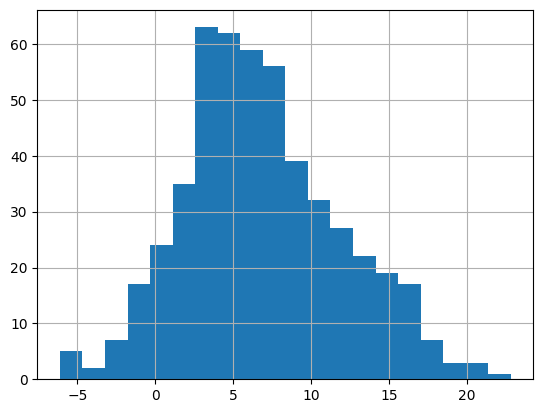

In [5]:

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

You'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant. The hypotheses are as follows:

$H_{0}$ The proportion of democratic votes in 2012 and 2016 were the same.

$H_{A}$ The proportion of democratic votes in 2012 and 2016 were different.

sample_dem_data is available and has the columns diff, dem_percent_12, and dem_percent_16 in addition to the state and county names. pingouin and has been loaded along with pandas as pd.

In [8]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data["diff"],y=0,alternative="two-sided")

                              
# Print the test results
print(test_results["p-val"])

T-test    3.600634e-115
Name: p-val, dtype: float64


What's the correct decision from the t-test, assuming $\alpha=0.01$ ?
Reject the null hipothesis

In [9]:
import pingouin
pingouin.ttest(x=sample_dem_data['dem_percent_12'],y=sample_dem_data['dem_percent_16'],paired=True,alternative='two-sided')  

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",0.454202,2.246e+111,1.0


Compare the paired t-test to an (inappropriate) unpaired test on the same data. How does the p-value change?
The p-value from the unpaired test is greater than the p-value from the paired test.

## ANOVA TESTS  
ANOVA tests determine whether there are differences between the groups.  
Once we have set $\alpha$ we can use the anova method to compare values across multiple groups  

import pingouin  
pingouin.anova(data=,dv=,between=,padjust="bonf")  

where dv is dependent variable, and the column of groups to calculate between. To run all these hypothesis tests in one go, we can use pair-wise tests and padjust=bonf where bonf is a correction

We've only considered the case of differences in a numeric variable between two categories. Of course, many datasets contain more categories. Before you get to conducting tests on many categories, it's often helpful to perform exploratory data analysis (EDA), calculating summary statistics for each group and visualizing the distributions of the numeric variable for each category using box plots.

Here, we'll return to the late shipments data, and how the price of each package (pack_price) varies between the three shipment modes (shipment_mode): "Air", "Air Charter", and "Ocean".

We've only considered the case of differences in a numeric variable between two categories. Of course, many datasets contain more categories. Before you get to conducting tests on many categories, it's often helpful to perform exploratory data analysis (EDA), calculating summary statistics for each group and visualizing the distributions of the numeric variable for each category using box plots.

Here, we'll return to the late shipments data, and how the price of each package (pack_price) varies between the three shipment modes (shipment_mode): "Air", "Air Charter", and "Ocean".

late_shipments is available; pandas and matplotlib.pyplot are loaded with their standard aliases, and seaborn is loaded as sns.

In [4]:
pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 23.2 MB/s eta 0:00:00
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [7 lines of output]
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.5 MB/s eta 0:00:00
      ERROR: Cannot set --home and --prefix together
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin
late_shipments = pd.read_feather('datasets/late_shipments.feather')


In [2]:
#Group late_shipments by shipment_mode and calculate the mean pack_price for each group, storing the result in xbar_pack_by_mode
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()

# Print the grouped means
print(xbar_pack_by_mode)

shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64


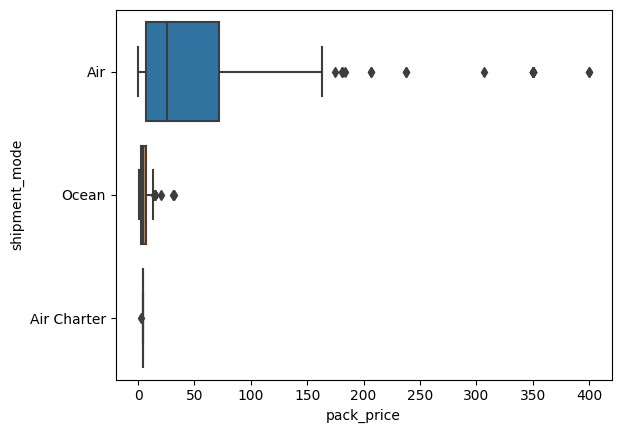

In [4]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x="pack_price",y="shipment_mode",data=late_shipments)
plt.show()

The box plots made it look like the distribution of pack price was different for each of the three shipment modes. However, it didn't tell us whether the mean pack price was different in each category. To determine that, we can use an ANOVA test. The null and alternative hypotheses can be written as follows.

$H_{0}$: Pack prices for every category of shipment mode are the same.

$H_{A}$: Pack prices for some categories of shipment mode are different.

Use a significance level of 0.1.

In [6]:
#Run an ANOVA on late_shipments investigating 'pack_price' (the dependent variable) between the groups of 'shipment_mode'.#
#Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data=late_shipments,dv="pack_price",between="shipment_mode")



# Print anova_results
print(anova_results)

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


Yes. The p-value is less than or equal to the significance level, so the null hypothesis should be rejected.

The ANOVA test didn't tell you which categories of shipment mode had significant differences in pack prices. To pinpoint which categories had differences, you could instead use pairwise t-tests.

In [ ]:
from pingouin import pairwise_tests
#Perform pairwise t-tests on late_shipments's pack_price variable, grouped by shipment_mode, without doing any p-value adjustment.
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="none")

# Print pairwise_results
print(pairwise_results)

ImportError: cannot import name 'pairwise_tests' from 'pingouin' (/usr/local/lib/python3.8/dist-packages/pingouin/__init__.py)

In [ ]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
print(pairwise_results)

AttributeError: module 'pingouin' has no attribute 'pairwise_tests'

## One-sample proportion tests  
Now calculate the test statistica without using the bootstrap distribution.  

Standarized test statistic for proportions  
$p$: population proportion (unknown population parameter)  
$\hat{p}:$ sample proportion (sample statistic)  
$p_{0}$: hypothesized population proportion  
$$z=\frac{\hat{p}-mean(\hat{p})}{SE(\hat{p})}=\frac{\hat{p}-p}{SE(\hat{p})}$$ 
Assumin $H_{0}$ is true, $p=p_{0}$, so  
$$z=\frac{\hat{p}-p_{0}}{SE(\hat{p})}$$  

Simplifying the standard error calculations  
$$SE_{\hat{p}}=\sqrt{ \frac{p_{0}(1-p_{0})}{n} }$$
under $H_{0}$, $SE_{\hat{p}}$ depends on hypothesized $p_{0}$ and sample size $n$  

Assuming $H_{0}$ is true  
$$z=\frac{\hat{p}-p_{0}}{ \sqrt{ \frac{p_{0}(1-p_{0})}{n} }  }$$  
Only uses sample information ($\hat{p}$ and $n$) and the hypothesized parameter ($p_{0}$).  

t-distribution - fatter tails than a normal distribution. In effect, the t-distribution provides extra caution against mistakenly rejecting the null hypothesis.

Do tests of proportion(s) use a or a test statistic and why?  
$z$:  The test statistic for proportion(s) has only one estimate of a parameter instead of two.  
The t-test is needed for tests of mean(s) since you are estimating two unknown quantities, which leads to more variability.

In Chapter 1, you calculated a p-value for a test hypothesizing that the proportion of late shipments was greater than 6%. In that chapter, you used a bootstrap distribution to estimate the standard error of the statistic. An alternative is to use an equation for the standard error based on the sample proportion, hypothesized proportion, and sample size.  
$$z=\frac{\hat{p}-p_{0}}{ \sqrt{ \frac{p_{0}(1-p_{0})}{n} }  }$$  
You'll revisit the p-value using this simpler calculation.

late_shipments is available. pandas and numpy are available under their usual aliases, and norm is loaded from scipy.stats.


In [3]:
from scipy.stats import norm
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments["late"]=="Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Print p_hat and n
print(p_hat, n)

0.061 1000


In [4]:
# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator

# Calculate the p-value from the z-score
p_value = 1-norm.cdf(z_score)

# Print the p-value
print(p_value)

0.44703503936503364


While bootstrapping can be used to estimate the standard error of any statistic, it is computationally intensive. For proportions, using a simple equation of the hypothesized proportion and sample size is easier to compute.

## Two sample proportion tests  
We can perform proportion tests_ztes() from statsmodels can calculate the z-score more directly.  
This function requires two objects as NumPy arrays: We can get these numbers by grouping by and value_counts of each groupby. Then  

from stats.models.stats.proportion import proportion_ztests  
z_score, p_value= proportions_ztest(count=,nobs=n_rows,alternative="two-sided")

Test of two proportions

You may wonder if the amount paid for freight affects whether or not the shipment was late. Recall that in the late_shipments dataset, whether or not the shipment was late is stored in the late column. Freight costs are stored in the freight_cost_group column, and the categories are "expensive" and "reasonable".

The hypotheses to test, with "late" corresponding to the proportion of late shipments for that group, are  
$H_{0}$: $late_{expensive}-late_{reasonable}=0$    
$H_{A}$: $late_{expensive}-late_{reasonable}>0$

In [9]:
print(late_shipments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   float64
 1   country                   1000 non-null   object 
 2   managed_by                1000 non-null   object 
 3   fulfill_via               1000 non-null   object 
 4   vendor_inco_term          1000 non-null   object 
 5   shipment_mode             1000 non-null   object 
 6   late_delivery             1000 non-null   float64
 7   late                      1000 non-null   object 
 8   product_group             1000 non-null   object 
 9   sub_classification        1000 non-null   object 
 10  vendor                    1000 non-null   object 
 11  item_description          1000 non-null   object 
 12  molecule_test_type        1000 non-null   object 
 13  brand                     1000 non-null   object 
 14  dosage   

In [10]:
from statsmodels.stats.proportion import proportions_ztest
# Import pandas
import pandas as pd
import numpy as np

late_shipments = pd.read_feather('datasets/late_shipments.feather')

# Count the late column values for each freight_cost_group

late_by_freight_cost_group = late_shipments.groupby("freight_cost_groups")["late"].value_counts()

# Print the counts
print(late_by_freight_cost_group)

freight_cost_groups  late
expensive            No      489
                     Yes      42
reasonable           No      439
                     Yes      16
Name: late, dtype: int64


In [11]:
# Create an array of the "Yes" counts for each freight_cost_group
success_counts = np.array([42, 16])

# Create an array of the total number of rows in each freight_cost_group
n = np.array([489+42, 439+16])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(success_counts,n,alternative="larger")


# Print the results
print(stat, p_value)

2.922648567784529 0.001735340002359578


## Chi-square test of independence
Just as ANOVA extends t-tests to more than two groups, chi-square tests of independence extend proportion tests to more than two groups. 

**Statistical independence**: proportion of success in the response variable is the same across all categories of the explanatory variable.    
Two categorical variables are consider statistically independent when the proportion of successes in the response variable is the same across all categories of the explanatory variable.  

The pingouin package has an indirect way of testing the difference in the proportions from the previous video. To the chi2_independence method.  

import pingouin  
expected, observed, stats= pingouin.chi2_independence(data=,x=,y=,correction=)  

* observed and expected counts squared mut be non-negative   
* chi-square tests are almost right-tailed
* Chi-square hypothesis tests rely on the chi-square distribution. Like the t-distribution, it has degrees of freedom and non-centrality parameters. 
* Like the t-distribution, the chi-square distribution has degrees of freedom and non-centrality parameters. When these numbers are large, the chi-square distribution can be approximated by a normal distribution.  
* The chi-square test statistic is a square number, so it is always non-negative, so only the right tail tends to be of interest.

The chi-square independence test compares proportions of successes of one categorical variable across the categories of another categorical variable.

The test to compare proportions of successes in a categorical variable across groups of another categorical variable is called a chi-square test of independence.

Trade deals often use a form of business shorthand in order to specify the exact details of their contract. These are International Chamber of Commerce (ICC) international commercial terms, or incoterms for short.

The late_shipments dataset includes a vendor_inco_term that describes the incoterms that applied to a given shipment. 

Perhaps the incoterms affect whether or not the freight costs are expensive. Test these hypotheses with a significance level of 0.01.

$H_{0}$: vendor_inco_term and freight_cost_group are independent.

$H_{A}$: vendor_inco_term and freight_cost_group are associated.

In [2]:
# Import pandas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pingouin

late_shipments = pd.read_feather('datasets/late_shipments.feather')
late_shipments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   float64
 1   country                   1000 non-null   object 
 2   managed_by                1000 non-null   object 
 3   fulfill_via               1000 non-null   object 
 4   vendor_inco_term          1000 non-null   object 
 5   shipment_mode             1000 non-null   object 
 6   late_delivery             1000 non-null   float64
 7   late                      1000 non-null   object 
 8   product_group             1000 non-null   object 
 9   sub_classification        1000 non-null   object 
 10  vendor                    1000 non-null   object 
 11  item_description          1000 non-null   object 
 12  molecule_test_type        1000 non-null   object 
 13  brand                     1000 non-null   object 
 14  dosage   

In [8]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)
# Print props
print(props)

vendor_inco_term  freight_cost_groups
CIP               reasonable             0.680000
                  expensive              0.320000
DDP               expensive              0.550000
                  reasonable             0.450000
DDU               reasonable             1.000000
EXW               expensive              0.583448
                  reasonable             0.416552
FCA               reasonable             0.663636
                  expensive              0.336364
Name: freight_cost_groups, dtype: float64


In [5]:
props.info()

<class 'pandas.core.series.Series'>
MultiIndex: 9 entries, ('CIP', 'reasonable') to ('FCA', 'expensive')
Series name: freight_cost_groups
Non-Null Count  Dtype  
--------------  -----  
9 non-null      float64
dtypes: float64(1)
memory usage: 451.0+ bytes


In [17]:
# Convert props to wide format
wide_props = props.unstack().fillna(0.2)
print(wide_props)

freight_cost_groups  expensive  reasonable
vendor_inco_term                          
CIP                   0.320000    0.680000
DDP                   0.550000    0.450000
DDU                   0.200000    1.000000
EXW                   0.583448    0.416552
FCA                   0.336364    0.663636


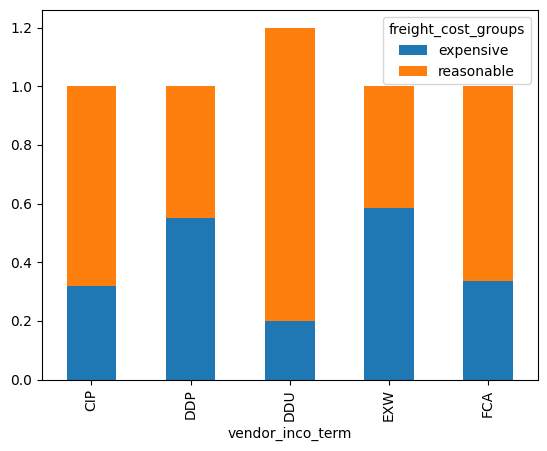

In [18]:
# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()

In [20]:
# Determine if freight_cost_group and vendor_inco_term are independent performing a chi-square test of independence on freight_cost_group and vendor_inco_term in the late_shipments dataset.
expected, observed, stats = pingouin.chi2_independence(data=late_shipments,y="freight_cost_groups",x="vendor_inco_term")

# Print results
print(stats[stats['test'] == 'pearson'])

      test  lambda       chi2  dof          pval    cramer     power
0  pearson     1.0  34.805072  4.0  5.093922e-07  0.186561  0.999235


Since p-val is less than the significance level, we reject the null hypothesis and conclude that vendor_inco_term and freight_cost_group are associated.

## Chi-square goodness of fit tests  
We'll use another variant of the chi-square test to compare a single categorical variable to a hypothesized distribution. We specify the hypotheses as whether or not the sample matches this hypothesized distribution. The test statistic, $\chi^{2}$, measures how far the observed sample distribution of proportions is from the hypothesized distribution.  

The one-sample $\chi^{2}$ test is called a goodness of fit test, as we're testing how well our hypothesized data fits the observed data. To run the test, we use the chisquare method from scipy.dot.stats. 

from scipy.stats import chisquare  
chisquare(f_obs=,f_exp=)

The chi-square goodness of fit test compares proportions of each level of a categorical variable to hypothesized values. Before running such a test, it can be helpful to visually compare the distribution in the sample to the hypothesized distribution.

Recall the vendor incoterms in the late_shipments dataset. You hypothesize that the four values occur with these frequencies in the population of shipments.

    CIP: 0.05
    DDP: 0.1
    EXW: 0.75
    FCA: 0.1

These frequencies are stored in the hypothesized DataFrame.

The incoterm_counts DataFrame stores the .value_counts() of the vendor_inco_term column.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin

late_shipments = pd.read_feather('datasets/late_shipments.feather')
hypothesized=pd.DataFrame({"vendor_inco_term":["CIP","DDP","EXW","FCA"],"prop":[0.05,0.10,0.75,0.10]})
incoterm_counts=late_shipments["vendor_inco_term"].value_counts().drop("DDU").rename_axis('vendor_inco_term').reset_index(name='n')

In [27]:
len(late_shipments)
#In the exercise this number is 999, then  

1000

In [28]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)-1

# Create n column that is prop column * n_total
hypothesized["n"] = (n_total)*(hypothesized["prop"])

# Print the modified hypothesized DataFrame
print(hypothesized["n"])
print(incoterm_counts["n"])

0     49.95
1     99.90
2    749.25
3     99.90
Name: n, dtype: float64
0    732
1    111
2    100
3     56
Name: n, dtype: int64


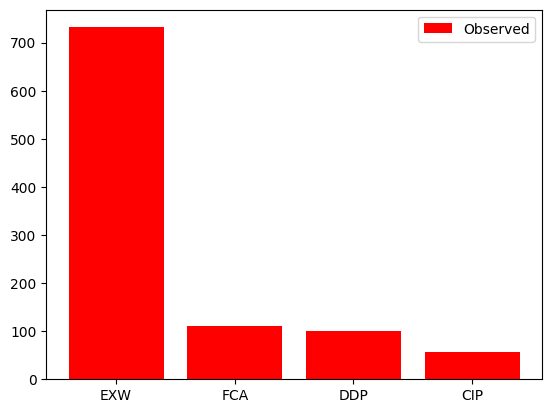

In [29]:
# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color="red", label="Observed")
plt.legend()
plt.show()

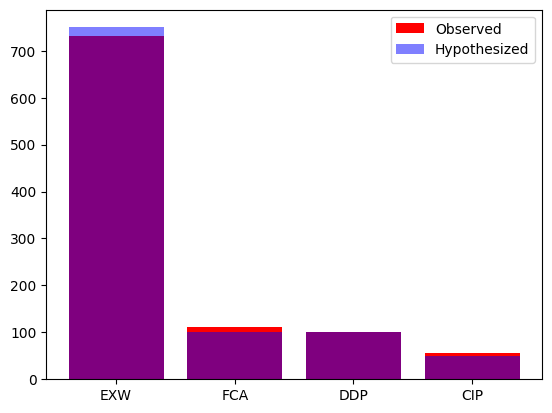

In [7]:
# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color="red", label="Observed")

# Add a blue bar plot for the hypothesized counts
plt.bar(hypothesized['vendor_inco_term'], hypothesized['n'],alpha=0.5,color="blue", label="Hypothesized")
plt.legend()
plt.show()

The bar plot of vendor_inco_term suggests that the distribution across the four categories was quite close to the hypothesized distribution. You'll need to perform a chi-square goodness of fit test to see whether the differences are statistically significant.

Recall the hypotheses for this type of test:

$H_{0}$: The sample matches with the hypothesized distribution.

$H_{A}$: The sample does not match with the hypothesized distribution.

To decide which hypothesis to choose, we'll set a significance level of 0.1.

In [30]:
print(incoterm_counts["n"].sort_values())
print(hypothesized["n"].sort_values())
print(len(incoterm_counts["n"].sort_values()))
print(len(hypothesized["n"].sort_values()))

3     56
2    100
1    111
0    732
Name: n, dtype: int64
0     49.95
1     99.90
3     99.90
2    749.25
Name: n, dtype: float64
4
4


In [31]:
from scipy.stats import chisquare
gof_test =chisquare(f_obs=incoterm_counts["n"].sort_values(),f_exp=hypothesized["n"].sort_values())
print(gof_test)

Power_divergenceResult(statistic=2.3633633633633613, pvalue=0.5004909543758689)


Fail to reject the null hypothesis and conclude that n follows the distribution specified by hypothesized

## Assumptions in hypothesis testing

### Large sample size t:test
* For one sample t-tests, a popular heuristic is that we need at least thirty observations in our sample; $n\geq30$
* For two samples at least 30 observations in each simple $n_{1}\geq 30$, and $n_{2}\geq 30$
* In ANOVA test, also $n\geq30$
* For paired samples, at least 30 pairs of observations across the samples  

### Large sample size: proportion tests
* One sample: number of successes and failures in a sample greater or equal than 10
* Two samples:  number of successes and failures in a sample greater or equal than 10

### Sanity check
* Calculate a bootstrap distribution and visualize it with a histogram, if we don't see a normal curve, then one of the assumptions has not been met.  

Which of the following statements is a common assumption of hypothesis tests?  
Sample observations have no direct relationship with each other. All hypothesis tests assume that the data are collected at random from the population, that each row is independent of the others, and that the sample size is "big enough".

In order to conduct a hypothesis test and be sure that the result is fair, a sample must meet three requirements: it is a random sample of the population, the observations are independent, and there are enough observations. Of these, only the last condition is easily testable with code.

The minimum sample size depends on the type of hypothesis tests you want to perform. You'll now test some scenarios on the late_shipments dataset.

Note that the .all() method from pandas can be used to check if all elements are true. For example, given a DataFrame df with numeric entries, you check to see if all its elements are less than 5, using (df < 5).all().

In [32]:
import pandas as pd
late_shipments = pd.read_feather('datasets/late_shipments.feather')


In [34]:
# Count the freight_cost_group values
#   Get the count of each value in the freight_cost_group column of late_shipments.
#   Insert a suitable number to inspect whether the counts are "big enough" for a two sample t-test.
counts = late_shipments["freight_cost_groups"].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

expensive     531
reasonable    455
Name: freight_cost_groups, dtype: int64
True


In [ ]:
# Count the late values
counts = late_shipments["late"].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 10).all())

In [36]:
# Count the values of freight_cost_group grouped by vendor_inco_term
counts = late_shipments.groupby("vendor_inco_term")["freight_cost_groups"].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 5).all())

vendor_inco_term  freight_cost_groups
CIP               reasonable              34
                  expensive               16
DDP               expensive               55
                  reasonable              45
DDU               reasonable               1
EXW               expensive              423
                  reasonable             302
FCA               reasonable              73
                  expensive               37
Name: freight_cost_groups, dtype: int64
False


In [37]:
# Count the shipment_mode values
counts = late_shipments["shipment_mode"].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

Air            906
Ocean           88
Air Charter      6
Name: shipment_mode, dtype: int64
False


## Non-parametric tests  

### Parametric tests
* Parametric tests: z-test, t-test, anova, all are paramtreics  
* Assume normal distribution
* Requiere sufficient large sample sizes  


### Non-parametric tests
In situations where we aren't sure about these assumptions, or we are certain that the assumptions aren't met, we can use non-parametric tests. They do not make the normal distribution assumptions or the sample size conditions. There are many different ways to perform tests without these parametric assumptions. 
* Many non-paramtreics tests uses ranks of data
* Non-parametric tests are more realiable than parametric tests for small sample sizes and when data is not normally distributed  


Wilcoxon-signed rank test
* Works on the ranked absolute differences between the pairs of data
* Incorporate the sum of the ranks for negative and positive difference
* The test statistic W is the smaller of these sums
* To calculate the p-vale we use the wilcoxon method from pingouin, which takes similar arguments that the .ttest method
* The Wilcoxon signed-rank test works well when the assumptions of a paired t-test aren't met.

You'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant.

sample_dem_data is available, and has columns dem_percent_12 and dem_percent_16 in addition to state and county names. The following packages have also been loaded: pingouin and pandas as pd.

In [8]:
import pandas as pd
import pingouin
sample_dem_data = pd.read_feather('datasets/dem_votes_potus_12_16.feather')
late_shipments = pd.read_feather('datasets/late_shipments.feather')

In [4]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data["dem_percent_12"],y=sample_dem_data["dem_percent_16"])
print(paired_test_results)

               T  dof alternative  ...   cohen-d       BF10  power
T-test  7.181565  998   two-sided  ...  0.454202  4.308e+09    1.0

[1 rows x 8 columns]


In [5]:
# Conduct a Wilcoxon test on dem_percent_12 and dem_percent_16
wilcoxon_test_results = pingouin.wilcoxon(x=sample_dem_data["dem_percent_12"],y=sample_dem_data["dem_percent_16"])



# Print Wilcoxon test results
print(wilcoxon_test_results)

           W-val alternative         p-val       RBC      CLES
Wilcoxon  2401.0   two-sided  1.780396e-77  0.961661  0.644816


## Non-parametric ANOVA and unpaired t-tests  
We'll continue on that theme here focusing on non-parametric alternatives to tests of independent numeric samples.  

We can avoid assumptions about normally distributed data by performing hypothesis tests on the ranks of a numeric input. The Wilcoxon-Mann-Whitney test is, very roughly speaking, a t-test on ranked data. This test is similar to the Wilcoxon test we saw in the last video, but works on unpaired data instead.  

import pingouin  
pingouin.mwu(x=,y=,alternative=)  

Kruskal-Wallis test is to Wilcoxon-Mann-Whitney test as ANOVA is to t-test. It works on long data   
pingouin.kruskal(data=,dv="",between="")

Ranks are the positions of numeric values from smallest to largest. Think of them as positions in running events: whoever has the fastest (smallest) time is rank 1, second fastest is rank 2, and so on.

By calculating on the ranks of data instead of the actual values, you can avoid making assumptions about the distribution of the test statistic. It's more robust in the same way that a median is more robust than a mean.

One common rank-based test is the Wilcoxon-Mann-Whitney test, which is like a non-parametric t-test.

In [9]:
# Select the weight_kilograms and late columns
weight_vs_late = late_shipments[["weight_kilograms","late"]]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns="late", 
                                           values="weight_kilograms")


# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(x=weight_vs_late_wide["No"],y=weight_vs_late_wide["Yes"],alternative='two-sided')



# Print the test results
print(wmw_test)

       U-val alternative     p-val       RBC      CLES
MWU  19134.0   two-sided  0.000014  0.331902  0.334049


The small p-value here leads us to suspect that a difference does exist in the weight of the shipment and whether or not it was late. The Wilcoxon-Mann-Whitney test is useful when you cannot satisfy the assumptions for a parametric test comparing two means, like the t-test.  

Recall that the Kruskal-Wallis test is a non-parametric version of an ANOVA test, comparing the means across multiple groups.

In [10]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data=late_shipments,dv="weight_kilograms",between="shipment_mode")



# Print the results
print(kw_test)

                Source  ddof1           H         p-unc
Kruskal  shipment_mode      2  125.096618  6.848799e-28


The Kruskal-Wallis test yielded a very small p-value, so there is evidence that at least one of the three groups of shipment mode has a different weight distribution than the others. Th Kruskal-Wallis test is comparable to an ANOVA, which tests for a difference in means across multiple groups.